## Import Dependencies


In [21]:
# Fast Computing and Data Handling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering by K-Means
from sklearn.cluster import KMeans

# Categorical Encoding
from sklearn.preprocessing import OneHotEncoder

## Data Collection and Analysis


In [ ]:
df = pd.read_csv('Mall_Customers.csv')  # Load CSV File as Pandas DataFrame

df.head(7)  # Display First 7 Rows

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [ ]:
df.shape  # (Rows ,Columns)

(200, 5)

In [ ]:
df.info()  # Information about Dataframe (# of Rows, # of Columns, Datatype of each)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()  # Display the Number of missing values in each column

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

_Wow, There is no missing values_


In [26]:
# Display Summary Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


_Check the Distribution of Genre Column_


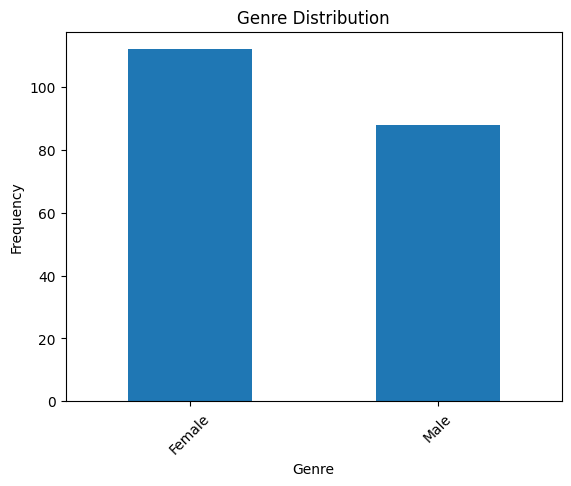

In [27]:
df["Genre"].value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

_Encode the Genre Column by One Hot Encoder_


In [ ]:
OHE = OneHotEncoder(sparse_output=False)

encoded = OHE.fit_transform(df[['Genre']])
# print(encoded)

encoded_df = pd.DataFrame(
    encoded, columns=OHE.get_feature_names_out(['Genre']))
df2 = pd.concat([df, encoded_df], axis=1)

df2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,Male,19,15,39,0.0,1.0
1,2,Male,21,15,81,0.0,1.0
2,3,Female,20,16,6,1.0,0.0
3,4,Female,23,16,77,1.0,0.0
4,5,Female,31,17,40,1.0,0.0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1.0,0.0
196,197,Female,45,126,28,1.0,0.0
197,198,Male,32,126,74,0.0,1.0
198,199,Male,32,137,18,0.0,1.0


## _Define the Features_


In [36]:
# X = df2.iloc[:, 2:]
X = df2.drop(['Genre', 'CustomerID'], axis=1).values
X

array([[ 19.,  15.,  39.,   0.,   1.],
       [ 21.,  15.,  81.,   0.,   1.],
       [ 20.,  16.,   6.,   1.,   0.],
       [ 23.,  16.,  77.,   1.,   0.],
       [ 31.,  17.,  40.,   1.,   0.],
       [ 22.,  17.,  76.,   1.,   0.],
       [ 35.,  18.,   6.,   1.,   0.],
       [ 23.,  18.,  94.,   1.,   0.],
       [ 64.,  19.,   3.,   0.,   1.],
       [ 30.,  19.,  72.,   1.,   0.],
       [ 67.,  19.,  14.,   0.,   1.],
       [ 35.,  19.,  99.,   1.,   0.],
       [ 58.,  20.,  15.,   1.,   0.],
       [ 24.,  20.,  77.,   1.,   0.],
       [ 37.,  20.,  13.,   0.,   1.],
       [ 22.,  20.,  79.,   0.,   1.],
       [ 35.,  21.,  35.,   1.,   0.],
       [ 20.,  21.,  66.,   0.,   1.],
       [ 52.,  23.,  29.,   0.,   1.],
       [ 35.,  23.,  98.,   1.,   0.],
       [ 35.,  24.,  35.,   0.,   1.],
       [ 25.,  24.,  73.,   0.,   1.],
       [ 46.,  25.,   5.,   1.,   0.],
       [ 31.,  25.,  73.,   0.,   1.],
       [ 54.,  28.,  14.,   1.,   0.],
       [ 29.,  28.,  82.,

_We deal with Unlabeled Data (Inputs without Outputs)_


## Selecting the Value of K


In [37]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[308911.34,
 212938.7150895141,
 143440.43314900764,
 104463.19922884135,
 75448.45165554191,
 58398.90268065269,
 54915.22389371382,
 48923.02802338673,
 45747.26772394273,
 38531.58480824523]

_Plot the Elbow Graph_


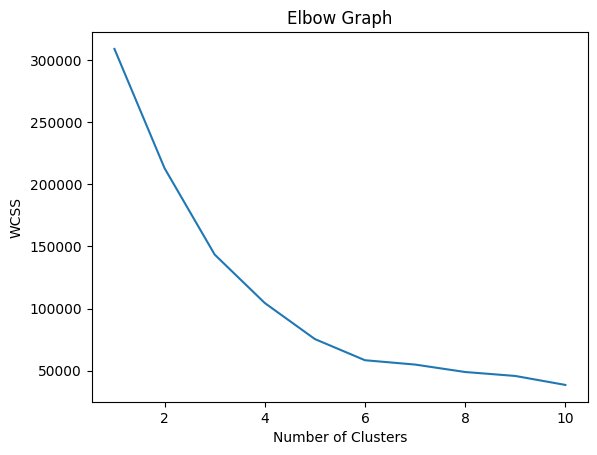

In [38]:
sns.set_style()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

_The Optimal Value of K = 5_


In [40]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=7)

Y = kmeans.fit_predict(X)
Y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

_Visualize All Clusters_


Text(0, 0.5, 'Spending Score')

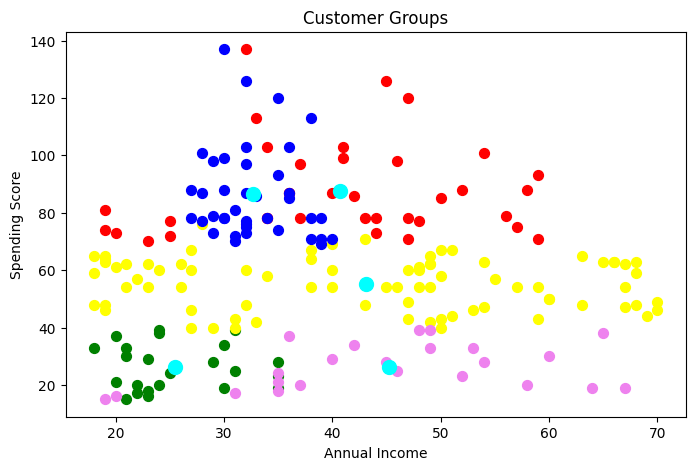

In [ ]:
# plotting all the clusters and their Centroid

plt.figure(figsize=(8, 5))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=100, c='cyan', label='Centroids')

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")